# Pycortex

Let's take a NIFTI file and map it to pycortex. This can't be hard... right?

In [1]:
%matplotlib inline

In [2]:
import os


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cortex
from cortex import mni
import nibabel as nib

In [4]:
from cortex.export import plot_panels, params_flatmap_lateral_medial, save_3d_views

params_flatmap_lateral_medial

params_flatmap_lateral = {
    'figsize': [16, 9],
     'panels': [{'extent': [0.0, 0.2, 1.0, 0.8],
       'view': {'angle': 'flatmap', 'surface': 'flatmap'}},
      {'extent': [0.0, 0.0, 0.3, 0.3],
       'view': {'hemisphere': 'left',
        'angle': 'lateral_pivot',
        'surface': 'inflated'}},
      {'extent': [0.7, 0.0, 0.3, 0.3],
       'view': {'hemisphere': 'right',
        'angle': 'lateral_pivot',
        'surface': 'inflated'}}]}


Take note of this directory- this is where the pycortex files are stored

In [5]:
cortex.database.default_filestore

'/home/njchiang/github/pycortex/filestore/db'

First, let's verify that everything is installed correctly and that their sample data works

Failed to get connection
** (inkscape:932): CRITICAL **: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed
** (inkscape:932): CRITICAL **: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed
** (inkscape:932): CRITICAL **: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


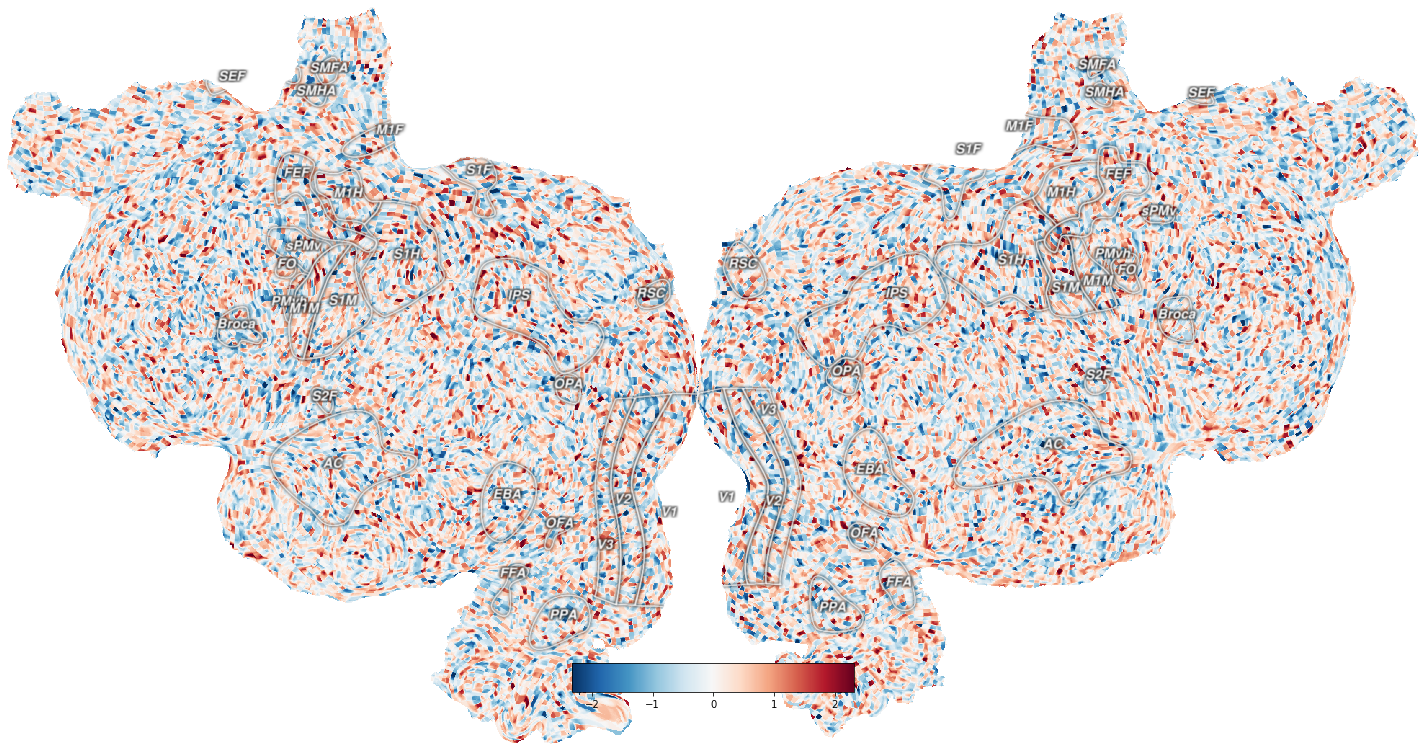

In [6]:
subject = 'S1'
xfm = 'fullhead'

# Creating a random dataset that is the shape for this transform with one
# entry for each voxel
test_data = np.random.randn(31, 100, 100)

# This creates a Volume object for our test dataset for the given subject
# and transform
vol_data = cortex.Volume(test_data, subject, xfm)
cortex.quickshow(vol_data)
plt.show()

# plot_panels(vol_data, **params_flatmap_lateral)

In [7]:
cortex.tr

<Transform into raw.nii.gz space>

In [24]:
def import_mat_file(name, tfm, ref):
    x = np.loadtxt(tfm)
    # Pass transform as FROM epi TO anat; transform will be inverted
    # back to anat-to-epi, standard direction for pycortex internal
    # storage by from_fsl

    raw = cortex.db.get_anat(subject, type='raw').get_filename()
    absreference = os.path.abspath(ref)
    xfm = cortex.xfm.Transform.from_fsl(x, absreference,raw)

    # Save as pycortex 'coord' transform
    xfm.save(subject, name,'coord')

In [25]:
tfm = os.path.join("/home/njchiang/data/fmri/Analogy/analysis/group/encoding/vis/betas", "to_pycortex.mat")
ref = "/home/njchiang/data/fmri/Analogy/derivatives/standard/swapdim_MNI.nii.gz"
import_mat_file("mni_swapdim", tfm, ref)


In [26]:
tfm = os.path.join("/home/njchiang/data/fmri/Analogy/analysis/group/encoding/vis/betas", "mni_to_pycortex.mat")
ref = "/home/njchiang/data/fmri/Analogy/derivatives/standard/MNI152_T1_2mm_brain.nii.gz"
import_mat_file("mni", tfm, ref)


In [27]:
tfm = os.path.join("/home/njchiang/data/fmri/Analogy/analysis/group/encoding/vis/betas", "pycortex_to_pycortex.mat")
ref = "/home/njchiang/data/fmri/Analogy/derivatives/standard/pycortex_ref.nii.gz"
import_mat_file("pycortex", tfm, ref)


Failed to get connection
** (inkscape:1470): CRITICAL **: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed
** (inkscape:1470): CRITICAL **: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed
** (inkscape:1470): CRITICAL **: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


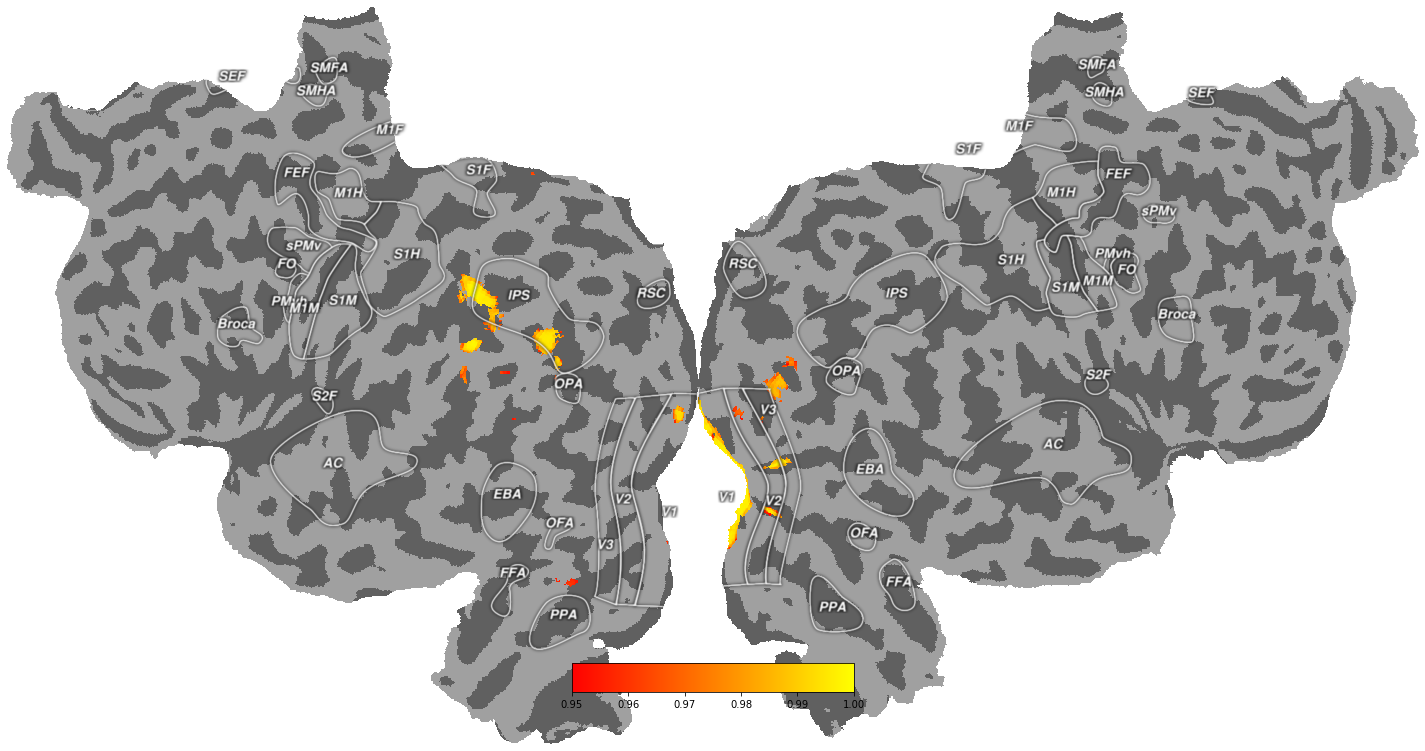

In [31]:
subject = 'S1'
xfm = 'mni'
model = "BART79"
rootdir = "/home/njchiang/data/fmri/Analogy/analysis/group/multivariate/rsa/pearson/"
fname = os.path.join(rootdir, f"n10000-AB_{model}_tfce_corrp_tstat1.nii.gz")
dat = nib.load(fname).get_data()
thr=0.95
dat[dat <= thr] = np.nan

vol_data = cortex.Volume(dat, subject, xfm, vmin=thr, vmax=1, cmap="autumn")
f = cortex.quickshow(vol_data, with_curvature=True, curvature_threshold=True)
# cortex.webgl.show(data=vol_data, with_rois=False)


Generating a flatmap cache
Failed to get connection
** (inkscape:1454): CRITICAL **: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed
** (inkscape:1454): CRITICAL **: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed
** (inkscape:1454): CRITICAL **: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


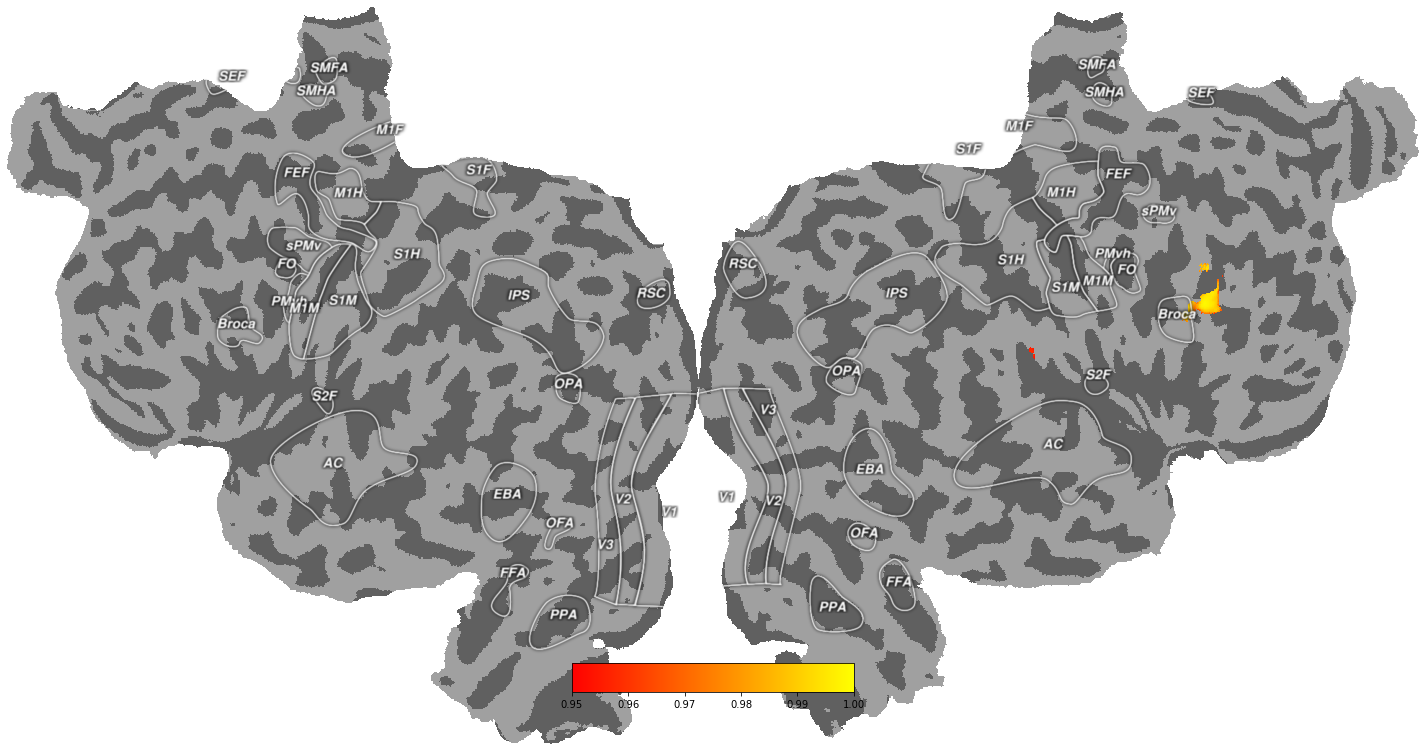

In [30]:
subject = 'S1'
xfm = 'pycortex'
model = "BART79"
rootdir = "/home/njchiang/data/fmri/Analogy/analysis/group/multivariate/rsa/pearson/vis/pycortex"
fname = os.path.join(rootdir, f"n10000-AB_{model}_tfce_corrp_tstat1.nii.gz")
dat = nib.load(fname).get_data()
thr=0.95
dat[dat <= thr] = np.nan

vol_data = cortex.Volume(dat, subject, xfm, vmin=thr, vmax=1, cmap="autumn")
f = cortex.quickshow(vol_data, with_curvature=True, curvature_threshold=True)
# cortex.webgl.show(data=vol_data, with_rois=False)


In [23]:
cortex.webgl.show(data=vol_data, with_rois=False)


Started server on port 12179
Stopping server


<JS: window.viewer>

In [13]:
cortex.db.get_mnixfm("S1", "fullhead")

array([[-1.01537556e+00,  1.60986290e-03,  6.71858549e-02,
         2.05931144e+02],
       [ 4.00160542e-02, -1.07410527e+00,  1.25669779e-01,
         2.20933938e+02],
       [ 8.66697661e-02,  1.25794658e-01,  1.10440278e+00,
        -4.27743604e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

array([[ 1.01736525e+00,  1.80502297e-02, -1.20851635e-02,
        -3.87105430e+01],
       [-1.68918160e-02, -2.17272358e-01,  1.06000152e+00,
         1.83073846e+01],
       [ 3.45203620e-03, -1.09352103e+00, -2.17350579e-01,
         2.46690608e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [34]:
nib.load(fname).affine

array([[ -1.        ,   0.        ,   0.        , 125.81391907],
       [  0.        ,   0.        ,   1.        , -94.5737915 ],
       [  0.        ,  -1.        ,   0.        , 133.33630371],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [45]:
print(cortex.db.get_anat("S1").header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.    1.    1.    1.    2.53  1.    1.    1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer May 22 2011'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : -0.70710677
qoffset_x       : 125.81392
qoffset_y       : -94.57379
qoffse

In [44]:
print(nib.load(fname).header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : -0.70710677
qoffset_x       : 125.81392
qoffset_y       : -94.57379
qoffset_z       : 133.3363
srow_x  